In [1]:
from periodicLatticeSolver import PeriodicLatticeSolver
from minimizer import Minimizer
import numpy as np
from FloorPlanClass import FloorPlan
from plotter import Plotter
PLS = PeriodicLatticeSolver(200, .02)
PLS.add_Injector()

L1 = PLS.Variable('L1', varMin=.01, varMax=.5)
L2= PLS.Variable('L2', varMin=.01, varMax=.5)
L3 =PLS.Variable('L3', varMin=.01, varMax=.5)
L4= PLS.Variable('L4', varMin=.01, varMax=.5)

Bp1 = PLS.Variable('Bp1', varMin=.1, varMax=.45)
Bp2 = PLS.Variable('Bp2', varMin=.1, varMax=.45)
Bp3 = PLS.Variable('Bp3', varMin=.1, varMax=.45)
Bp4 = PLS.Variable('Bp4', varMin=.1, varMax=.45)

rp1 = PLS.Variable('rp1', varMin=.01, varMax=.03)
rp2 = PLS.Variable('rp2', varMin=.01, varMax=.03)
rp3 = PLS.Variable('rp3', varMin=.01, varMax=.03)
rp4 = PLS.Variable('rp4', varMin=.01, varMax=.03)

r0=PLS.Variable('r0',varMin=1,varMax=1.25)
TL1=PLS.Variable('TL1',varMin=.5,varMax=1.5)
TL2=PLS.Variable('TL2',varMin=.5,varMax=1.5)


PLS.set_Track_Length(TL1=TL1,TL2=TL2)
PLS.begin_Lattice()

PLS.add_Bend(None, r0, .45)
PLS.add_Drift(L=.03)
PLS.add_Lens(L4, Bp4, rp4)
PLS.add_Drift()
PLS.add_Combiner()
PLS.add_Drift()
PLS.add_Lens(L1, Bp1,rp1)
PLS.add_Drift(L=.03)
PLS.add_Bend(None, r0, .45)
PLS.add_Drift(L=.03)
PLS.add_Lens(L2, Bp2, rp2)
PLS.add_Drift()
PLS.add_Lens(L3, Bp3, rp3)
PLS.add_Drift(L=.03)
PLS.end_Lattice()

Lattice model completed


100%|██████████| 250/250 [14:12<00:00,  3.41s/it]


minCost for each thread:  [1.77884858 1.81172382 1.69820792 1.78369304 1.73112711 1.73133105
 1.80623944 1.81578596 1.80114632 1.76964138 1.75032774 1.75035817]


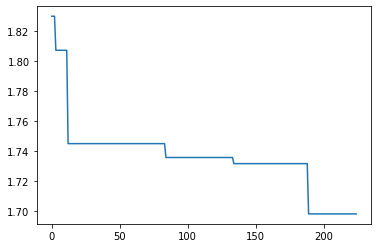

[ 0.41952521  0.4444301   0.41788638  0.31205015  0.3359166   0.41063103
  0.45        0.12060764  0.03        0.02658622  0.03        0.01158451
  1.11705798  0.8336654   0.98124631  0.14270529  0.08881755 -0.05      ] 1.6982079206124103
175 183
percent particles surviving (x,y): 12.5, 8.5
[ 0.41952521  0.4444301   0.41788638  0.31205015  0.3359166   0.41063103
  0.45        0.12060764  0.03        0.02658622  0.03        0.01158451
  1.11705798  0.8336654   0.98124631  0.14270529  0.08881755 -0.05      ] 1.6982079206124103
done
Total time 14 minutes and 13 seconds


In [2]:
minimizer=Minimizer(PLS)
minimizer.find_Global_Min(mut=.75, crossPop=.7, iterations=5000,herds=64, popPerDim=20,strategy='best/1')

[0.4195 0.4444 0.4179 0.3121 0.3359 0.4106 0.45   0.1206 0.03   0.0266
 0.03   0.0116 1.1171 0.8337 0.9812]


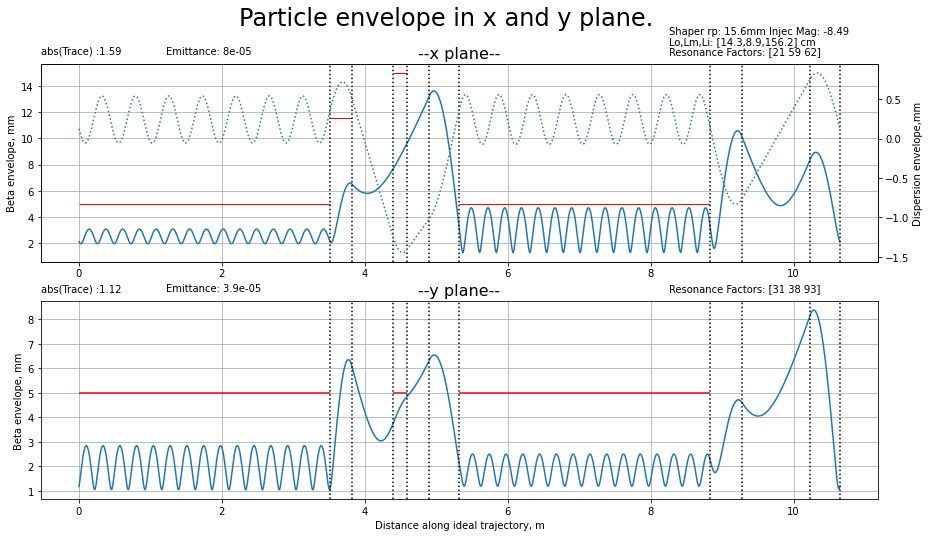

In [3]:
plotter=Plotter(PLS)
plotter.plot(sol=minimizer.sol)

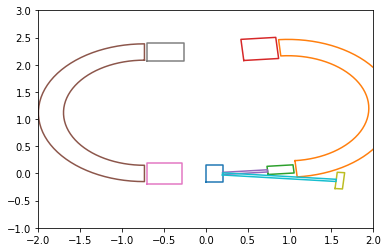

4.0

In [4]:
floorPlan=FloorPlan(PLS)
floorPlan.show_Floor_Plan(sol=minimizer.sol)
floorPlan.calculate_Cost()